Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
380
Loaded pretrained weights for efficientnet-b4
batch_size : 1,  train/val : 264 / 107
['model1']


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch /{}
----------
train Loss: 0.1362 Acc: 99.2424
Training epochs 0 in 1m 14s



 10%|█         | 1/10 [01:48<16:16, 108.45s/it]

val Loss: 3.3390 Acc: 14.0187
==> best model saved - 0 / 14.0
Training epochs 0 in 1m 48s

Epoch /{}
----------
train Loss: 0.0020 Acc: 100.0000
Training epochs 1 in 0m 46s



 20%|██        | 2/10 [02:39<09:57, 74.68s/it] 

val Loss: 5.1245 Acc: 14.0187
Training epochs 1 in 0m 51s

Epoch /{}
----------
train Loss: 0.0008 Acc: 100.0000
Training epochs 2 in 0m 46s



 30%|███       | 3/10 [03:30<07:26, 63.83s/it]

val Loss: 5.3698 Acc: 14.0187
Training epochs 2 in 0m 51s

Epoch /{}
----------
train Loss: 0.0005 Acc: 100.0000
Training epochs 3 in 0m 46s



 40%|████      | 4/10 [04:22<05:55, 59.20s/it]

val Loss: 5.7416 Acc: 14.0187
Training epochs 3 in 0m 52s

Epoch /{}
----------
train Loss: 0.0003 Acc: 100.0000
Training epochs 4 in 0m 46s



 50%|█████     | 5/10 [05:13<04:40, 56.19s/it]

val Loss: 6.0066 Acc: 14.0187
Training epochs 4 in 0m 51s

Epoch /{}
----------
train Loss: 0.0002 Acc: 100.0000
Training epochs 5 in 0m 46s



 60%|██████    | 6/10 [06:04<03:37, 54.37s/it]

val Loss: 6.2004 Acc: 14.0187
Training epochs 5 in 0m 51s

Epoch /{}
----------
train Loss: 0.0002 Acc: 100.0000
Training epochs 6 in 0m 46s



 70%|███████   | 7/10 [06:55<02:39, 53.26s/it]

val Loss: 6.3869 Acc: 14.0187
Training epochs 6 in 0m 51s

Epoch /{}
----------
train Loss: 0.0001 Acc: 100.0000
Training epochs 7 in 0m 46s



 80%|████████  | 8/10 [07:46<01:45, 52.60s/it]

val Loss: 6.3252 Acc: 14.0187
Training epochs 7 in 0m 51s

Epoch /{}
----------
train Loss: 0.0001 Acc: 100.0000
Training epochs 8 in 0m 46s



 90%|█████████ | 9/10 [08:37<00:52, 52.25s/it]

val Loss: 6.3965 Acc: 14.0187
Training epochs 8 in 0m 51s

Epoch /{}
----------
train Loss: 0.0001 Acc: 100.0000
Training epochs 9 in 0m 46s



100%|██████████| 10/10 [09:28<00:00, 56.89s/it]

val Loss: 6.4252 Acc: 14.0187
Training epochs 9 in 0m 51s

Training complete in 9m 29s
Best valid Acc: 0 - 14.0


model saved
end time : 0:09:34
best model : 0 - 14 / 3.3


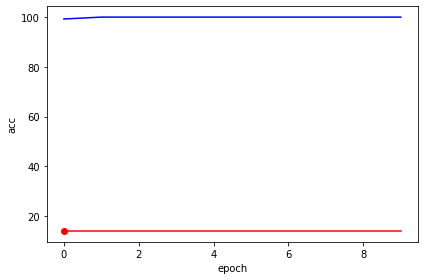

(EfficientNet(
   (_conv_stem): Conv2dStaticSamePadding(
     3, 48, kernel_size=(3, 3), stride=(2, 2), bias=False
     (static_padding): ZeroPad2d((0, 1, 0, 1))
   )
   (_bn0): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
   (_blocks): ModuleList(
     (0): MBConvBlock(
       (_depthwise_conv): Conv2dStaticSamePadding(
         48, 48, kernel_size=(3, 3), stride=[1, 1], groups=48, bias=False
         (static_padding): ZeroPad2d((1, 1, 1, 1))
       )
       (_bn1): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
       (_se_reduce): Conv2dStaticSamePadding(
         48, 12, kernel_size=(1, 1), stride=(1, 1)
         (static_padding): Identity()
       )
       (_se_expand): Conv2dStaticSamePadding(
         12, 48, kernel_size=(1, 1), stride=(1, 1)
         (static_padding): Identity()
       )
       (_project_conv): Conv2dStaticSamePadding(
         48, 24, kernel_size=(1, 1), strid

In [2]:
#이피션트넷참고자료 https://keep-steady.tistory.com/35
#구글드라이브를 마운트 
from google.colab import drive
drive.mount('/content/drive')
#코랩용 설치
!pip install efficientnet_pytorch
#import, from
import time  # time() 함수 : 현재 Unix timestamp을 소수로 리턴,  정수부는 초단위이고 소수부는 마이크로 초단위
import datetime  # datetime.timedelta  : 기간을 표현하기 위해서 사용
import os
import copy  # 복사
import cv2
import random  # 랜덤
import numpy as np
import json  # JSON(JavaScript Object Notation), attribute–value pairs / array data types / any other serializable value 로 이루어진 데이터를 전달하기 텍스트를 사용하는 포맷
import torch  # facebook에서 제공하는 딥러닝 도구, numpy와 효율적인 연동을 지원
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt  # 시각화
from PIL import Image  # PIL 이미지 제어
from efficientnet_pytorch import EfficientNet  # EfficientNet : 이미지 분류 최고의 모델
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # CUDA (Computed Unified Device Architecture)는 NVIDIA에서 개발한 GPU 개발 툴이다.
#cpu
#코어 개수 1~16 : 싱글코어 또는 멀티프로세싱을 활용한 보유 코어 만큼의 멀티코어
#코어별 속도는 시피유가 빠르기 때문에 직렬연산{재귀연산(recursive연산)}에 좋다
#gpu
#코어 개수 몇천개 이상
#멀티코어 > 병렬연산에 좋다
#model = model.to(device) # inputs = inputs.to(device) # labels = labels.to(device) # outputs = model(inputs) # 아웃풋 = 모델에디바이스(인풋에디바이스)
#torch.cuda.device(device) : 선택된 장치를 변경하는 context 관리자
#torch.cuda.device 의 파라미터 : device ( torch.device 또는 int ) – 선택할 장치 인덱스, 인수가 음의 정수 또는 None이면 작동X(no-op)
hyper_param_batch = 1  # 배치 사이즈 # 기본 4 이상( > 아웃풋4)
random_seed = 100  # 랜덤 시드
#random_seed = 100 활용, 랜덤값 고정
random.seed(random_seed)
torch.manual_seed(random_seed)
#변수 선언
num_classes = 4  # 0 1 2 3  4가지로 분류  num_classes=num_classes   모델선언할 때  이피션트넷비7에 4가지클래스 0123 의모델 선언
model_name = 'efficientnet-b4'  # 진짜 모델 이름
# b0 ~ b7 : b0 이 가장 가볍고 파라미터가 적다 위 숫자 수정하여 변경 가능
train_name = 'model1'  # 트레인, 벨리, 테스트 셋 상위폴더 이름
#기존코드 : PATH = './scalp_weights/'     # 여기에 모델.pt가 save
PATH = '/content/drive/MyDrive/project/scalp_weights/'  # 코랩용
#기존코드
#data_train_path = './train_data/' + train_name + '/train'  # 현재폴더/train_data/model1/train
#data_validation_path = './train_data/' + train_name + '/validation'  # 현재폴더/train_data/model1/validation
#data_test_path = './train_data/' + train_name + '/test'  # 현재폴더/train_data/model1/test 
#코랩용
data_train_path ='/content/drive/MyDrive/project/train_data/'+train_name+'/train' 
data_validation_path = '/content/drive/MyDrive/project/train_data/'+train_name+'/validation' 
data_test_path ='/content/drive/MyDrive/project/train_data/'+train_name+'/test' 
image_size = EfficientNet.get_image_size(model_name)  # model_name = 'efficientnet-b7'
print(image_size)  # 600 출력
#모델선언
model = EfficientNet.from_pretrained(model_name, num_classes=num_classes)  # 이피션트넷 모델 선언 # 출력 pretrained weight 로드
num_classes = 4 # 이피션트넷 모델선언 (파라미터), 0 1 2 3  4가지
#model_name = 'efficientnet-b7' # 진짜 모델 이름
model = model.to(device)  # device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#transforms.Compose : Rescale 과 RandomCrop 을 한번에 수행
#Rescale: 이미지의 크기를 조절
#RandomCrop: 이미지를 무작위로 자른다
#정규화
def func(x):  #아래 transforms_train = 코드에서 transforms.Lambda(lambda x: x.rotate(90)) 에서 나는 에러를 잡기 위해 def로 빼주고 람다 속 람다를 제거함
    return x.rotate(90)
transforms_train = transforms.Compose([ 
    transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX), # interpolation=4 워닝을 제거하기 위해 변형
    transforms.RandomHorizontalFlip(p=0.5), #  interpolation 보간법 (두점을궤적으로연결하는방법, 알려진 지점 사이의 중간값을 추정하는 방법)
            #리사이즈할 때 이미지품질에 관여한다
    #InterpolationMode.NEAREST: 0,    최저품질
    #InterpolationMode.LANCZOS: 1,
    #InterpolationMode.BILINEAR: 2,
    #InterpolationMode.BICUBIC: 3,
    #InterpolationMode.BOX: 4,
    #InterpolationMode.HAMMING: 5     최고품질
        #예를 들어, 어떤 사람이 20살일때 키와 40살에서의 키를 보고 30살에서의 키를 추측하는 것은 interpolation이고 
        #과거 1살때부터 현재 나이까지의 키를 보고 앞으로 10년 후의 키를 예측하는 것은 extrapolation이다. 
        #또한 최근 한달간의 주가 동향을 보고 내일의 주가를 예측하는 것도 extrapolation이며 extrapolation은 
        #interpolation에 비해 훨씬 안정성이 떨어지는 (위험한) 예측 방법이다.
    transforms.RandomVerticalFlip(p=0.5),
    transforms.Lambda(func),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ToTensor(), #텐서화
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) #노말라이즈 정규화
])
#ImageNet은 입력이 224x224 형식이므로 이에 맞춰 Resize 해준다. 그리고 torch의 입력형태인 Tensor로 바꿔 준 후 Normalize 해준다.
transforms_val = transforms.Compose([
    transforms.Resize([int(600), int(600)], interpolation=transforms.InterpolationMode.BOX),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
#data_train_path 경로의 이미지를 transforms.Compose 로 규정한 규칙에 의해 정규화,텐서화 하며 (트랜스폼하며) 데이터를 불러옴
train_data_set = datasets.ImageFolder(data_train_path, transform=transforms_train)
val_data_set = datasets.ImageFolder(data_validation_path, transform=transforms_val)
#변수 선언
dataloaders, batch_num = {}, {}
#dataloaders 빈딕셔너리에 train/val 키랑 DataLoder 밸류 넣기
#DataLoader로 학습용 데이터 준비 : 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한다 (데이터와타겟/피처와정답)
dataloaders['train'] = DataLoader(train_data_set,
                                  batch_size=hyper_param_batch,
                                  shuffle=True,
                                  num_workers=2)  # aihub코드  num_workers = 4
dataloaders['val'] = DataLoader(val_data_set,
                                batch_size=hyper_param_batch,
                                shuffle=False,
                                num_workers=2)  # aihub코드  num_workers = 4
#즉 dataloaders 딕셔너리에는 train / val 이 key 각 밸류는 정규화한 이미지 데이터에 + 라벨이 붙음
#DataLoader를 통해 네트워크에 올리기
#from torch.utils.data import Dataset,DataLoader 
#testloader = DataLoader(testset, batch_size=2, shuffle=False, num_workers=0)
    #데이터 로더는 데이터의 대량 가져오기 또는 내보내기를 위한 클라이언트 응용 프로그램 
    #for data, target in testloader: 에서 data는 데이터의 특징  target은 데이터의 정답값
#배치_넘은 빈 딕셔너리
#train/val 을 key로 각 밸류 선언
batch_num['train'], batch_num['val'] = len(train_data_set), len(val_data_set)
print('batch_size : %d,  train/val : %d / %d' % (hyper_param_batch, batch_num['train'], batch_num['val']))
#출력 :      batch_size : 6,   train/val :             2066       /         499
#      hyper_param_batch = 6    train/val :  len(train_data_set)   /    len(val_data_set)
class_names = train_data_set.classes  # train_data_set 정규화한 트레인셋
print(class_names)  # 출력 : [ '[원천]미세각질_0.양호', '[원천]미세각질_1.경증', '[원천]미세각질_2.중등도', '[원천]미세각질_3.중증'  ]
#def 선언 후 마지막에 train_model(model, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=num_epochs) 로 실행
from tqdm import tqdm # 진행률 표시를 위한
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    if __name__ == '__main__':  # 프롬프트에서 돌리기 위해 추가. 네임메인에 관해 런타임에러를 디버그 
        ##변수 선언
        #시간변수 선언
        start_time = time.time()  # end_sec 종료시간 = time.time() - start_time, # 종료시간 :
        since = time.time()  # time_elapsed 경과시간 = time.time() - since, # 경과시간 : 모든 에폭을 돌리는데 걸린 시간
        best_acc = 0.0  # 베스트 정확도 갱신시킬 변수
        best_model_wts = copy.deepcopy(model.state_dict())  # 베스트가중치도 갱신: 베스트 정확도 갱신할 때 같이 갱신
        #state_dict 는 간단히 말해 각 계층을 매개변수 텐서로 매핑되는 Python 사전(dict) 객체입니다.
        #state_dict : 모델의 매개변수를 딕셔너리로 저장
        #copy.deepcopy 깊은복사: 완전한복사 (얕은복사:일종의 링크 형태)
        #손실, 정확도 빈리스트 선언
        train_loss, train_acc, val_loss, val_acc = [], [], [], []
        #for문
        for epoch in tqdm(range(num_epochs)):  # epoch만큼 실행
            print('Epoch /{{}}'.format(epoch, num_epochs - 1))  # 1000에폭을 넣으면 Epoch 0/999 이렇게 출력      왜 -1을 넣었을가 ?
            print('-' * 10)  # ---------- 구분 선
            epoch_start = time.time()  # 매 에폭을 돌리는 시간
            for phase in ['train', 'val']: # 에폭 1번 돌릴 때 학습모드페이즈~ 평가모드페이즈~ 한번씩 구동
                if phase == 'train':
                    model.train()  # model.train()  ≫ 모델을 학습 모드로 변환
                else:
                    model.eval()  # model.eval()  ≫ 모델을 평가 모드로 변환
                #train이 들어가면 학습모드로 아래 코드 실행, val이 들어가면 평가모드로 val로 평가
                #변수
                running_loss = 0.0
                running_corrects = 0
                num_cnt = 0
                #아래코드이해를위한
                #dataloaders 빈딕셔너리에 train/val 키랑 DataLoder 밸류 넣기
                #DataLoader로 학습용 데이터 준비 : 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한다
                #dataloaders['train'] = DataLoader(train_data_set,
                #                                   batch_size=hyper_param_batch,
                #                                   shuffle=True,
                #                                   num_workers=4)
                #dataloaders['val'] = DataLoader(val_data_set,
                #                                 batch_size=hyper_param_batch,
                #                                 shuffle=False,
                #                                 num_workers=4)
                for inputs, labels in dataloaders[phase]:  # phase 에 train or val 이 들어가서 인풋과 라벨로 나뉜다
                  #위에서 데이터로더 딕셔너리에 트레인과 벨리셋 두개로 나눴다 그리고 데이터로더에서 이터러블하게 뽑으면서 데이터의 특징과정답값을 뽑는다
                    inputs = inputs.to(device) # inputs 은 데이터의 피처
                    labels = labels.to(device)  # labels 는 데이터의 정답 / 폴더세팅에 따라 (폴더이름오름차순) 정답값이 자동으로 설정
                    optimizer.zero_grad()  # optimizer.zero_grad() : Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에
                    #우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야합니다.
                    #한번 학습이 완료가 되면 gradients를 0으로 초기화
                    with torch.set_grad_enabled(phase == 'train'): # 트레인페이즈라 그래디언트 계산은 활성화한다
                        #torch.set_grad_enabled
                        #그래디언트 계산을 켜키거나 끄는 설정을 하는 컨텍스트 관리자
                        #phase == 'train' 이 true 면 gradients를 활성화 한다.
                        outputs = model(inputs)  # 모델에 데이터의 피처를 넣어서 아웃풋 생성
                        _, preds = torch.max(outputs, 1)  # _, preds ?
                        #torch.max(input-tensor) : 인풋에서 최댓값을 리턴하는데 tensor라 각 묶음마다 최댓값을 받고 ,1 은 축소할 차원이1이라는 뜻
                        loss = criterion(outputs, labels)  # 로스 계산
                        #매 epoch, 매 iteration 마다 back propagation을 통해 모델의 파라미터를 업데이트 시켜주는 과정이 필요한데,
                        #아래 다섯 줄의 코드는 공식처럼 외우는 것을 추천드립니다.
                        #optimizer.zero_grad()   	# init grad
                        #pred = model(x)  # forward
                        #loss = criterion(pred, x_labels) # 로스 계산
                        #loss.backward()  # backpropagation
                        #optimizer.step()  	# weight update
                        if phase == 'train':
                            loss.backward()  # backpropagation
                            optimizer.step()  # weight update
                    running_loss += loss.item() * inputs.size(0)  # 학습과정 출력   #   running_loss = 0.0    # loss 는 로스계산  ?
                    running_corrects += torch.sum(preds == labels.data)  # running_corrects = 0                    ?
                    num_cnt += len(labels)  # num_cnt = 0                             ?
                #for inputs, labels in dataloaders[phase]: # phase 에 train or val 이 들어가서 인풋과 라벨로 나뉜다
                #                 inputs = inputs.to(device)
                #                 labels = labels.to(device)
                if phase == 'train':
                    scheduler.step()  # 학습 규제
                #학습률이 크면 가중치 업데이트가 많아 가중치가 overflow 될 수도 있습니다
                #훈련 초기에 학습률은 충분히 좋은 가중치에 도달하기 위해 크게 설정됩니다. 시간이 지남에 따라
                #이러한 가중치는 작은 학습률을 활용하여 더 높은 정확도에 도달하도록 미세 조정됩니다.
                #결국, 가중치를 규제(regularization)하는 방식과 비슷하게, 학습률을 규제하는(Learning Rate Decay)것이 Learning Rate Scheduler라고 할 수 있습니다.
                #optimizer와 scheduler를 먼저 정의한 후, 학습할 때 batch마다 optimizer.step() 하고 epoch마다 scheduler.step()을 해주면 됩니다.
                #def 밖에서  op sc 선언 def안에서 op.step  sc.stop 완료
                epoch_loss = float(running_loss / num_cnt)  # ? 에폭손실
                epoch_acc = float((running_corrects.double() / num_cnt).cpu() * 100)  # ? 에폭 정확도
                #     손실, 정확도 빈리스트 선언
                #     train_loss, train_acc, val_loss, val_acc = [], [], [], []
                if phase == 'train':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc)
                else:
                    val_loss.append(epoch_loss)
                    val_acc.append(epoch_acc)
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))  # 출력 train/val, 손실, 정확도
            #deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_idx = epoch   
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    print('==> best model saved - %d / %.1f' % (best_idx, best_acc))  # 몇번째 에폭의 베스트 정확도가 세이브되었나 출력
                #     best_acc = 0.0 # 베스트 정확도 갱신시킬 변수
                #     best_model_wts = copy.deepcopy(model.state_dict()) # 베스트가중치도 갱신: 베스트 정확도 갱신할 때 같이 갱신
                #state_dict 는 간단히 말해 각 계층을 매개변수 텐서로 매핑되는 Python 사전(dict) 객체입니다.
                #state_dict : 모델의 매개변수를 딕셔너리로 저장
                #copy.deepcopy 깊은복사: 완전한복사 (얕은복사:일종의 링크 형태)
                epoch_end = time.time() - epoch_start  # train/val 전부 에폭 한번 돌리는 시간을 구해서 아래 출력
                print('Training epochs {} in {:.0f}m {:.0f}s'.format(epoch, epoch_end // 60,
                                                                    epoch_end % 60))  # 트레이닝에폭 epoch 몇분 몇초
                print()
                #for문 끝
    time_elapsed = time.time() - since  # 경과시간 : 모든 에폭을 돌리는데 걸린 시간, for 문이 끝났으니까
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))  # 경과시간을 몇분 몇초로 출력
    print('Best valid Acc: %d - %.1f' % (best_idx, best_acc))  # best_idx : 몇번째 에폭이 베스트인지, 베스트정확도 출력
#load best model weights  
    model.load_state_dict(best_model_wts)  # state_dict: 모델의 매개변수를 딕셔너리에 담은 > 것을 load 한다
    #best_model_wts = copy.deepcopy(model.state_dict())
    #PATH = './scalp_weights/' # 경로 설정 현재폴더 하위에 scalp_weights 폴더
    torch.save(model, PATH + 'aram_' + train_name + '.pt')  # 모델을 PATH경로에 aram_트레인네임(model1).pt 라는 이름으로 저장한다
    torch.save(model.state_dict(), PATH + 'president_aram_' + train_name + '.pt')  # 모델의 매개변수를               -  저장
    print('model saved')
    end_sec = time.time() - start_time  # 종료시간    # 초단위에서
    end_times = str(datetime.timedelta(seconds=end_sec)).split('.')  # 시분초로 치환
    #import datetime
    #end = 8888
    #datetime.timedelta(seconds=end)                                #출력  datetime.timedelta(seconds=8888)
    #str(datetime.timedelta(seconds=end))  # type str              #출력  '2:28:08'
    #str(datetime.timedelta(seconds=end)).split('.') # type list   #출력   ['2:28:08']  ?
    #str(datetime.timedelta(seconds=end)).split('.')[0] # type str  #출력  '2:28:08'
    end_time = end_times[0]  # 종료시간 시분초
    print("end time :", end_time)  # 출력
    ################################
    ##에폭별 아큐러시 그래프 그리기
    print('best model : %d - %1.f / %.1f'%(best_idx, val_acc[best_idx], val_loss[best_idx]))
    fig, ax1 = plt.subplots()
    ax1.plot(train_acc, 'b-') #선그래프Y축
    ax1.plot(val_acc, 'r-') #선그래프Y축
    plt.plot(best_idx, val_acc[best_idx], 'ro') #벨리셋 아큐러시 최대치 나오는 지점을 점 찍어주기
    ax1.set_xlabel('epoch') 
    #Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('acc', color='k')
    ax1.tick_params('y', colors='k')
    #ax2 = ax1.twinx()
    #ax2.plot(train_loss, 'g-')
    #ax2.plot(val_loss, 'k-')
    #plt.plot(best_idx, val_loss[best_idx], 'ro')
    #ax2.set_ylabel('loss', color='k')
    #ax2.tick_params('y', colors='k')
    fig.tight_layout()
    plt.show() #그래프 출력
    ################################
    return model, best_idx, best_acc, train_loss, train_acc, val_loss, val_acc
    #def 문 끝
#def실행할 train_model 파라미터 선언
#model = EfficientNet.from_pretrained(model_name, num_classes=num_classes).to(device)  # 첫번째 파라미터 (위에서 선언)
criterion = nn.CrossEntropyLoss()  # 두번째 파라미터
optimizer_ft = optim.Adam(model.parameters(), lr=1e-4)  # 세번째 파라미터
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)  # 네번째 파라미터  # 스케줄러 선언
num_epochs = 10 # 다섯번째 파라미터 # 에폭2 에 31분 걸림
#def 문 실행
train_model(model, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=num_epochs)